# CMB PHYSICS TUTORIAL-1 

## Import modules

In [56]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower

## Recombination History using HyRec

In [53]:
os.chdir("/home/harshu/HYREC-2")
# Load the hyrec output file
hyrec_output = np.loadtxt('output_1.dat')

# Extract relevant columns (this may vary depending on the actual output format)
redshift = hyrec_output[:, 0]  # Assuming first column is redshift
ionization_fraction = hyrec_output[:, 1]  # Assuming second column is ionization fraction
temper = hyrec_output[:, 2]  # Assuming second column is ionization fraction


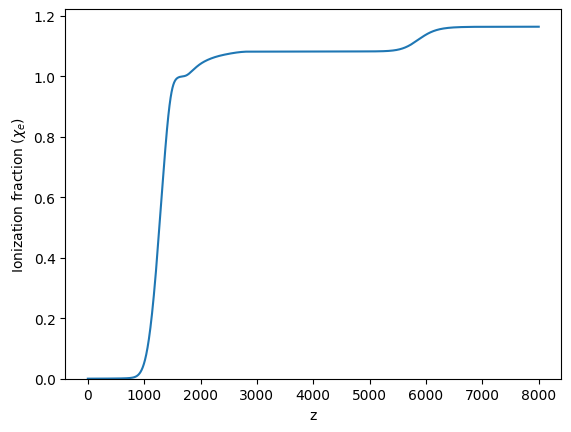

In [60]:
import pylab as plt
plt.plot(redshift,ionization_fraction)
#plt.plot(redshift,temper)
plt.xlabel("z")
plt.ylabel(r"Ionization fraction ($\chi_e$)")
plt.ylim(0)
plt.show()

## Plot the ionization fraction and temperature with redshift for the case of dark matter annihilation.

In [55]:
#Please write your codes here

## Define Parameters for CAMB

In [62]:
pars = camb.set_params(H0=70, ombh2=0.0196, omch2=0.1274, As=2e-9, ns=0.95,Recomb = camb.recombination.Recfast(RECFAST_Hswitch = False,RECFAST_Heswitch = 0), omk=0, tau=0.2,)
data= camb.get_background(pars)


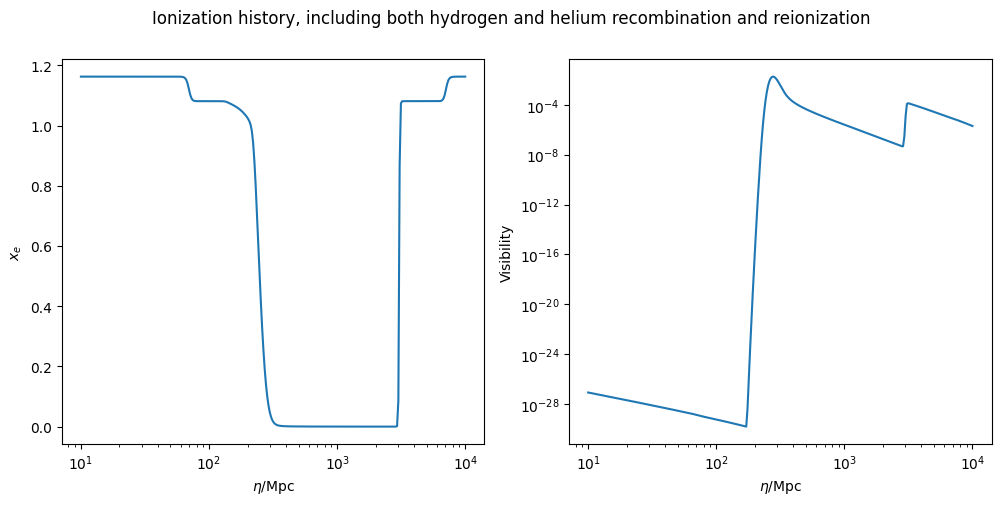

In [63]:

eta = 10**(np.linspace(1, 4,300))
back_ev = data.get_background_time_evolution(eta, ['x_e', 'visibility'])
fig, axs= plt.subplots(1,2, figsize=(12,5))
axs[0].semilogx(eta, back_ev['x_e'])
axs[1].loglog(eta, back_ev['visibility'])
axs[0].set_xlabel(r'$\eta/\rm{Mpc}$')
axs[0].set_ylabel('$x_e$')
axs[1].set_xlabel(r'$\eta/\rm{Mpc}$')
axs[1].set_ylabel('Visibility');
fig.suptitle('Ionization history, including both hydrogen and helium recombination and reionization');

## Plot the case by using different Recfast corrections

In [64]:
## Please solve here

## Define Parameters for Power spectrum

In [32]:


#The defaults give one massive neutrino and helium set using BBN consistency
pars = camb.set_params(H0=70, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, 
                       As=2e-9, ns=0.965,max_l=3000)

## Get Results

In [19]:
results1 = camb.get_results(pars)
powers =results1.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


(2901, 4)


Text(0, 0.5, '$\\frac{\\ell (\\ell + 1) C_{\\ell}}{2 \\pi}$')

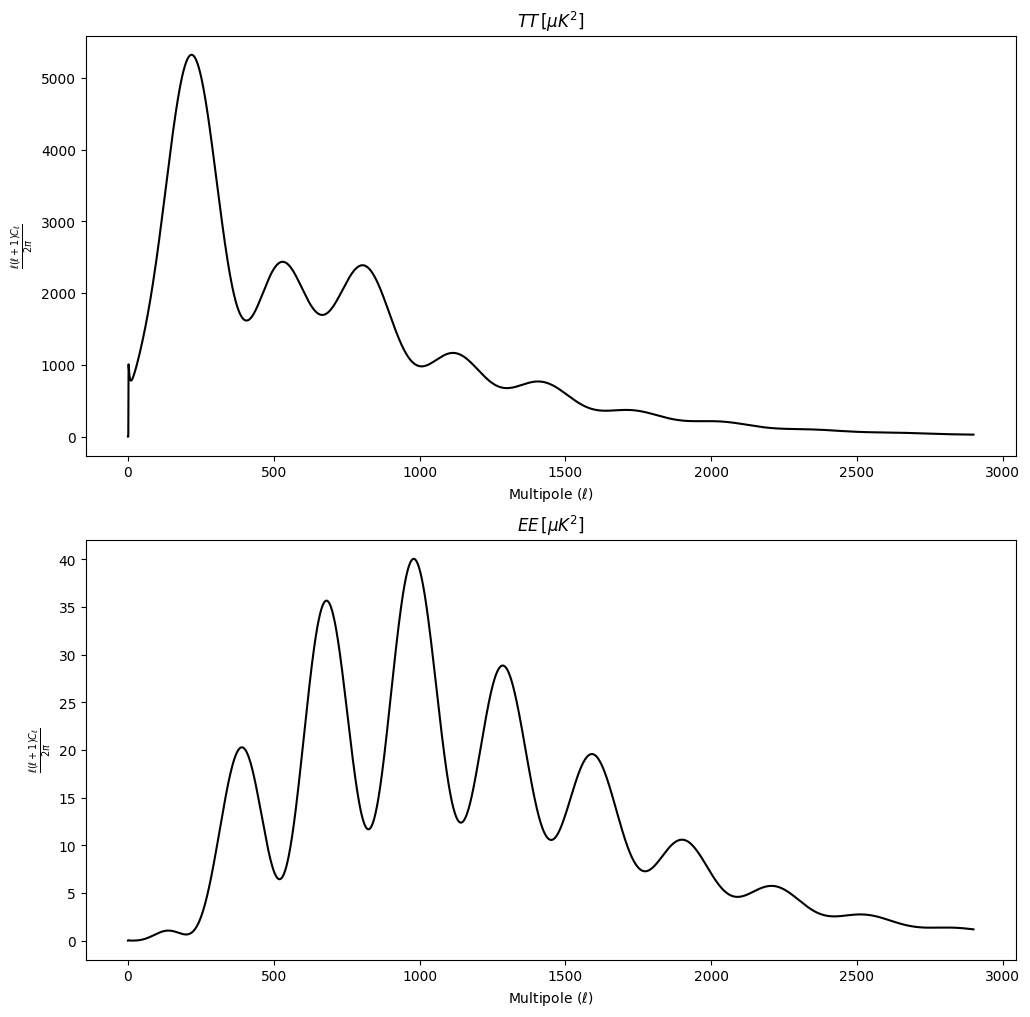

In [20]:
totCL=powers['total']
print(totCL.shape)
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,1, figsize = (12,12))
ax[0].plot(ls,totCL[:,0], color='k')
ax[0].set_title(r'$TT\, [\mu K^2]$')
ax[1].plot(ls,totCL[:,1], color='k')
ax[1].set_title(r'$EE\, [\mu K^2]$')
ax[0].set_xlabel(r"Multipole ($\ell$)")
ax[1].set_xlabel(r"Multipole ($\ell$)")
ax[0].set_ylabel(r"$\frac{\ell (\ell + 1) C_{\ell}}{2 \pi}$")
ax[1].set_ylabel(r"$\frac{\ell (\ell + 1) C_{\ell}}{2 \pi}$")


## Visualize the maps

In [21]:

import healpy as hp
def dl_cl(ell,dl):
    return 2*np.pi*dl/(ell*(ell+1))
nside = 512
ell = np.arange(1,3*nside+1)
newcl = []
newcl2 = []
for j in range(4):
    newcl.append(dl_cl(ell,totCL[:3*nside,j]))


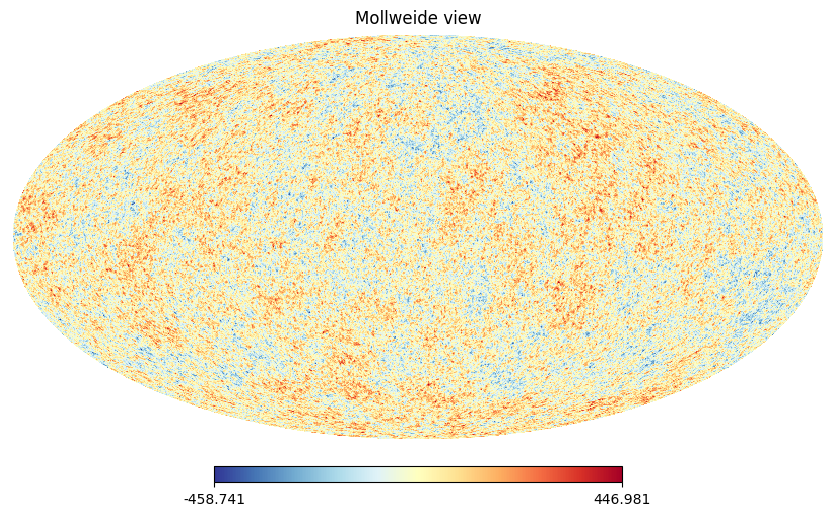

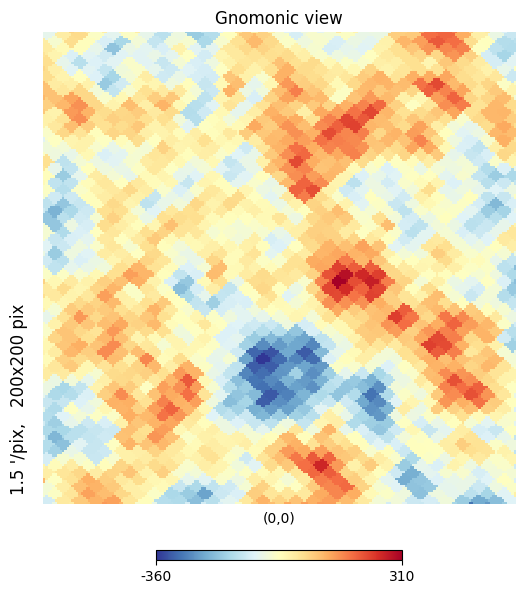

In [22]:
np.random.seed(12)
map1 = hp.synfast(newcl,nside = nside)
hp.mollview(map1[0],rot=(0,0,),cmap = "RdYlBu_r")
hp.gnomview(map1[0],rot=(0,0,),cmap = "RdYlBu_r", reso=1.5)

   ## If there is no dark matter in the universe, or if the universe is open, the CMB power spectrum changes. Plot and compare the CMB power spectrums for the cases with the LCDM case and also compare the maps with same random seeds.

In [ ]:
# Please write your codes here

## Plotting the Matter power spectra at redshifts z = 0 and z = 0.8

In [25]:
pars =  camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, ns=0.965)
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


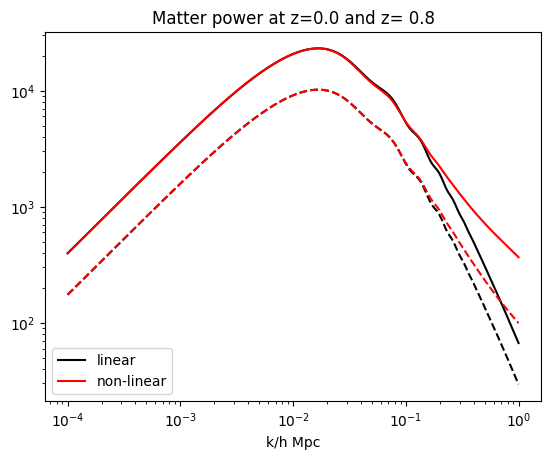

In [26]:

for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
    plt.loglog(kh_nonlin, pk_nonlin[i,:], color='r', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=%s and z= %s'%tuple(z));

## Check the change in matter power spectrum for the no dark matter case